## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is using other variables to predict the outcome of a numerical variable. Classification is using other variables to predict the outcome of a categorial variable.
2. A confusion table is a cross tabulation of predictions versus actual values of a classification. Since the prediction is a classification, this table will be comparing the predicted and actual values of a categorial varable. This kind of table helps us to understand if our model is useful on datasets that were not used to train the model.
3. The SSE quantifies how well the model fits the data by taking the distance between predictions and actual points.
4. Underfitting the model is when not enough data points are used to build the model, so it is inaccurate at making predictions. Overfitting is the opposite, when the model uses to many points in its creation. When a model uses too many points, the predictions that it makes are no specficic and end up just being an average of all the data points.
5. Splitting the data into training and testing sets allows us to test the accuracy of the model. To create the model, we have to use a certain set of data, but to then validate the model we need a different set of data that it hasn not seen before. As such, we can take our original dataset, split it up, and then use part of that for training, and the other part for testing. Choosing K by looking at SSE mean we choose the number of neighbors based on which k value provides the least error.
6. Testing accuracy through reporting a class label is quite simple and gives an easy number, but fails to account for complexity in certain cases of False postives and false negatives. Using probability distribution over labels is also simple to do and does an ok job at prediction, but this method can also end up intentionally leaving certain cateogories out of the model.



In [49]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [10]:
#load file
import requests
file = "https://raw.githubusercontent.com/RyanErm/knn/refs/heads/main/data/USA_cars_datasets.csv"
df = pd.read_csv(file)
#create subset
df = df[["price", "year", "mileage"]]
#check for nas
print(df.isna().sum())
print(df.head())
print(df.shape)

price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


In [11]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
df['mileage'] = (df['mileage']-min(df['mileage']))/(max(df['mileage'])-min(df['mileage']))
df['year'] = (df['year']-min(df['year']))/(max(df['year'])-min(df['year']))
print(df.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


In [21]:
train = df.loc[:,['year','mileage']]
#create training and test sets
X_train, X_test, y_train, y_test = train_test_split(train, df['price'], test_size=0.2, random_state=152)


In [53]:
k_values = [3,10,25,50,100,300]
SSE_on_test = []
y_hats = []
#go through each k value
for k in k_values:
  #set up model
  model = KNeighborsRegressor(n_neighbors=k)
  fitted_model = model.fit(X_train,y_train)
  #test the model using the test set
  y_hat = fitted_model.predict(X_test)
  #compute the sum of squared errors
  SSE_on_test.append( np.sum( (y_test-y_hat)**2 ) )
  #save the predicted values
  y_hats.append(y_hat)

SSE_on_test


[64466816766.666664,
 55258039449.5,
 52560353633.448,
 52138042502.47401,
 52476581989.892,
 53890456129.5903]

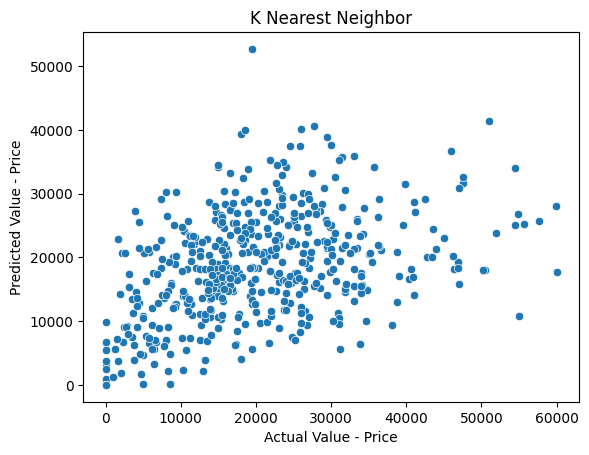

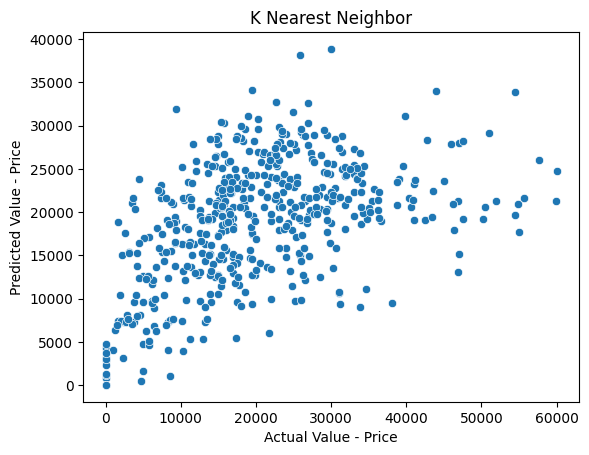

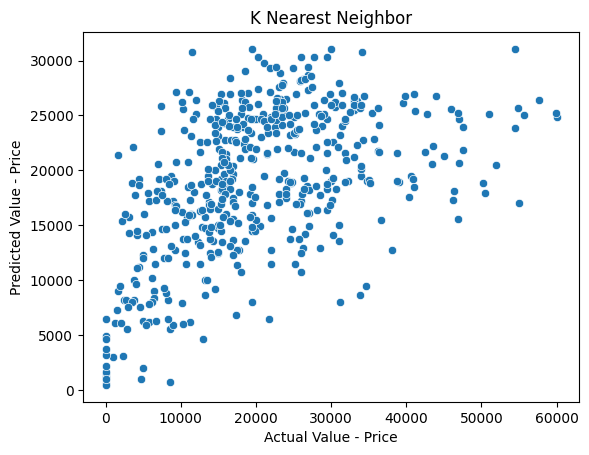

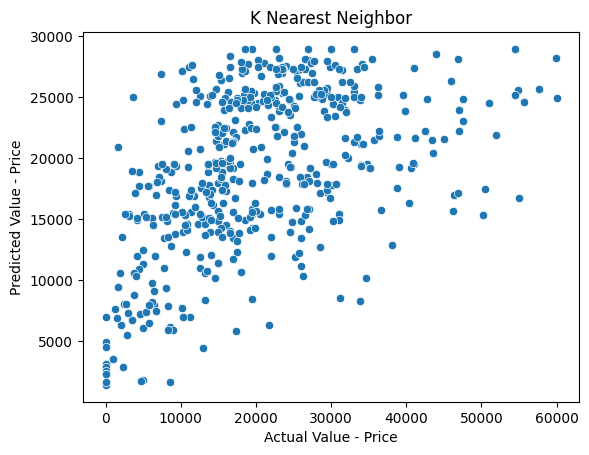

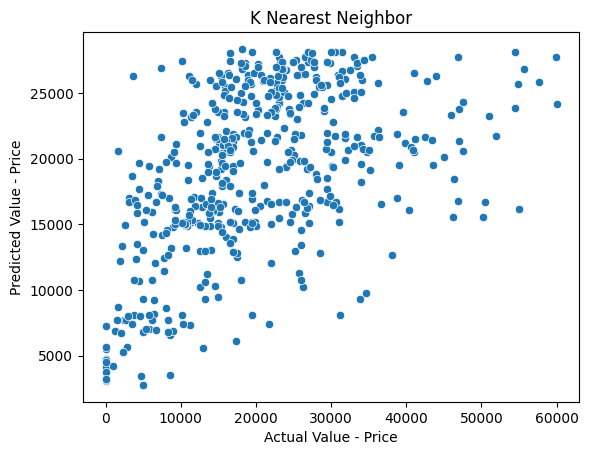

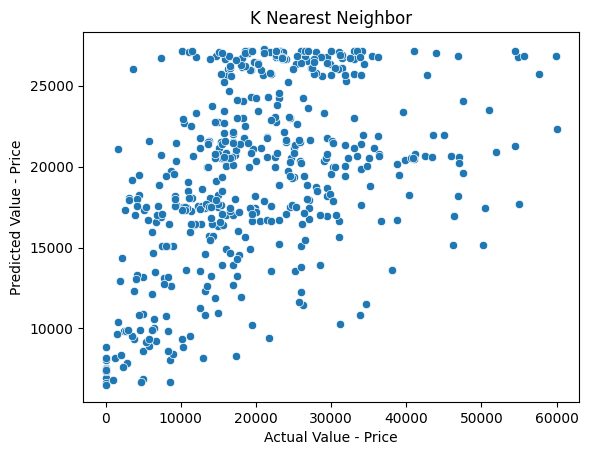

In [54]:
#plot the predicted and actual price estimates for each value of k
#the first graph is the lowest value of k and the last graph is the highest value of k
for i in range (6):
  sns.scatterplot(x=y_test,y=y_hats[i])
  plt.title("K Nearest Neighbor")
  plt.xlabel("Actual Value - Price")
  plt.ylabel("Predicted Value - Price")
  plt.show()



The most important pattern to notice as K increases is that the sum of squared errors will start to decrease, but then it will start to increase again. This is due to the model eventually being overfitted with data. This can also be seen on the graphs. If the model was perfect then the scatter plot would be a diagonal line because the predicted values were the same as the actual values. But as the k-value gets higher and the model starts being overfit, the graph gets more spread and stops resembling a line. This is extremely apparent when the value of k is 300, as can be seen on the final graph above.

The optimal k value for this data set is 50 as it has the lowest sum of squared errors, and is therefore making the most accurate predictions.

Describe what happened in the plots of predicted versus actual prices as  k  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

For the lowest k value, 3, the plot of actual vs. predicted values was very spread out and showed that the model was not trained well. This can be seen because the plot does not resemble a straight line. As mentioned above, a straight, diagonal scatter plot in this scenario means that the model is predicting what the actual values are. In this first plot, there is no semblence to a line. The model is currently underfit, meaning that it is making very general predictions as it does not have enough data ot do anything else. As the k increases, the plots begins to resemble a straight line. Obviously it cannot ge tthere because that would mean the model is perfect, which is very hard to acheive. But after the k value of 50, the plots start to divulge into random clumps again and no longer have any semblence of a line. This is because the model is starting to be over fit to the training data, and is no longer accurate on predicting the test data.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.